<a href="https://colab.research.google.com/github/peetdenny/FastAI/blob/master/ScamperWang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classifies UK spiders :D
Can distinguish between
* House spider (Tegenaria domestica)
* Giant House spider (Eratigena atrica)
* Zebra Spider (Salticus scenicus)
* Sector Spider (Zygiella x-notata)
* Cellar Spider (Pholcidae)
* Cucumber Spider (Araniella cucurbitina)
* Cross Orb Weaver (Araneus diadematus)
* False Widow (Steatoda nobilis)


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:

from google.colab import drive
import io
import tarfile
import PIL
import boto3
from fastai.vision import *
from pathlib import Path
import os

drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
path = Path('./gdrive/My Drive/spiders/image-set')


In [0]:
bs=64
img_size=299

In [0]:
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2, ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [11]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:01<00:00, 54638738.64it/s]


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


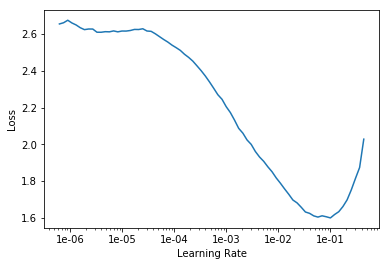

In [35]:
learn.lr_find()
learn.recorder.plot()

In [36]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.239982,0.594252,0.188540,01:21
1,0.840596,0.539666,0.188540,01:22
2,0.654024,0.509431,0.166359,01:20
3,0.522168,0.516577,0.158965,01:21


In [0]:
interp = ClassificationInterpretation.from_learner(learn)

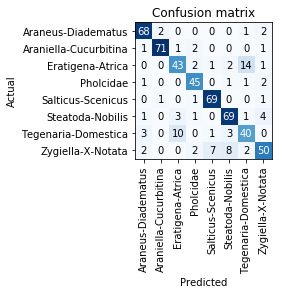

In [38]:
interp.plot_confusion_matrix()

In [0]:
learn.save("stage-1")

In [44]:
learn.load("stage-1")
np.random.seed(42)
learn.unfreeze()
learn.fit_one_cycle(6, max_lr=slice(1e-5,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.392768,0.498860,0.162662,01:26
1,0.362017,0.464328,0.147874,01:25
2,0.311294,0.442876,0.140481,01:24
3,0.255397,0.450900,0.151571,01:25
4,0.215207,0.444617,0.142329,01:24
5,0.196527,0.441064,0.142329,01:25


In [0]:
learn.save("stage-2"); #14.2

In [0]:
learn.load("stage-2")

In [0]:
learn.export()

In [0]:
interp = ClassificationInterpretation.from_learner(learn)


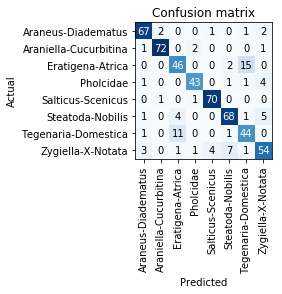

In [48]:
#interp.plot_top_losses(15, figsize=(20,20))
interp.plot_confusion_matrix()

#Inference
Right! Time to infer some spiders!

In [0]:
learner = load_learner(path)


In [18]:
learner.data

8

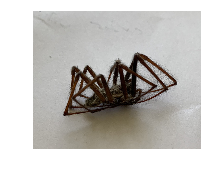

In [29]:
img = open_image('./gdrive/My Drive/spiders/test-images/Teg1.jpg')
img.show()

In [37]:
learn.predict(img)


(Category Eratigena-Atrica,
 tensor(2),
 tensor([0.0091, 0.0021, 0.4964, 0.2425, 0.0049, 0.1442, 0.0209, 0.0800]))